In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rainfall-in-pakistan/Rainfall_1901_2016_PAK.csv


# Dependencies

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reading data

In [3]:
df=pd.read_csv('../input/rainfall-in-pakistan/Rainfall_1901_2016_PAK.csv')
df.head()

,Rainfall - (MM),Year,Month
0,40.4258,1901,January
1,12.3022,1901,February
2,25.5119,1901,March
3,14.2942,1901,April
4,38.3046,1901,May


## Columns of dataframe
**Note:** One thing to notice there's a space before Year column so let's rename that

In [4]:
df.columns

Index(['Rainfall - (MM)', ' Year', 'Month'], dtype='object')

In [5]:
# Renaming columns
df.rename(columns={'Rainfall - (MM)':'rainfall-MM',' Year':'year','Month':'month'}, inplace=True)

In [6]:
df.head()

,rainfall-MM,year,month
0,40.4258,1901,January
1,12.3022,1901,February
2,25.5119,1901,March
3,14.2942,1901,April
4,38.3046,1901,May


In [7]:
df.columns

Index(['rainfall-MM', 'year', 'month'], dtype='object')

In [8]:
df.isna().sum()

rainfall-MM    0
year           0
month          0
dtype: int64

Unique number of years

In [9]:
df['year'].nunique()

116

let's find those years

In [10]:
df['year'].unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016])

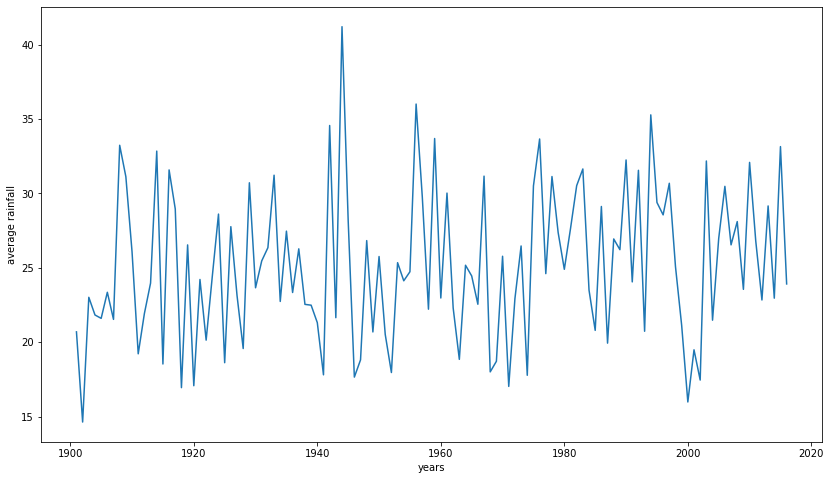

In [11]:
plt.figure(figsize=(14,8))
plt.plot(df.groupby(['year']).mean())
plt.xlabel('years')
plt.ylabel('average rainfall')
plt.show()

Calculate mean rainfall of year

In [12]:
df[df['year']==2016].mean()['rainfall-MM']

23.913654999999995

## Let's find average rainfall across months

df['quarter'] = pd.PeriodIndex(df.Month, freq='Q')

In [13]:
avg_rainfall_by_month=df.groupby(df.month)['rainfall-MM'].mean()

So the top performing month is July unexpected one :D

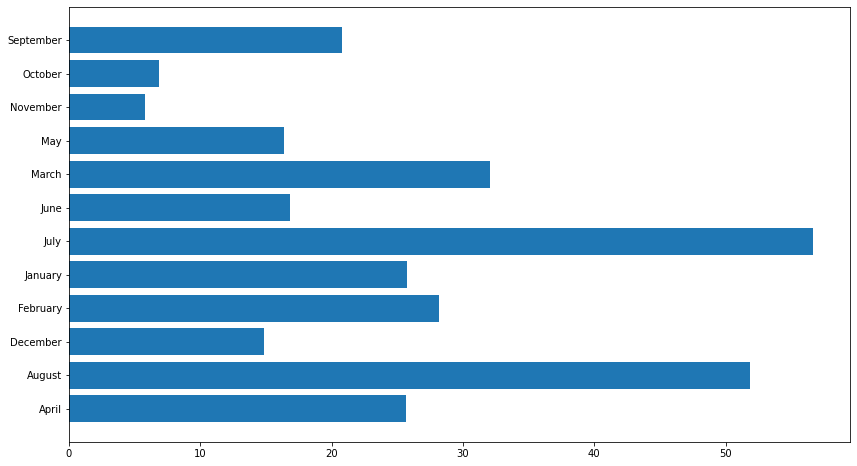

In [14]:
plt.figure(figsize=(14,8))
plt.barh(avg_rainfall_by_month.index,avg_rainfall_by_month)
plt.show()

In [15]:
avg_rainfall_across_years=df.groupby(df.year)['rainfall-MM'].mean()

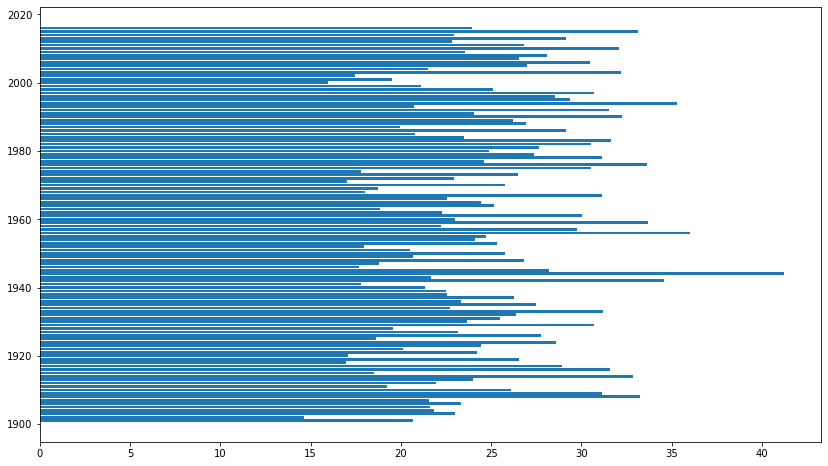

In [16]:

plt.figure(figsize=(14,8))
plt.barh(avg_rainfall_across_years.index,avg_rainfall_across_years)
plt.show()

Let's sort the values to better estimate the top performer year

In [17]:
avg_rainfall_across_years.sort_values(ascending=False)

year
1944    41.197529
1956    35.999497
1994    35.272982
1942    34.558610
1959    33.684169
          ...    
1920    17.075132
1971    17.028849
1918    16.945073
2000    15.983080
1902    14.635436
Name: rainfall-MM, Length: 116, dtype: float64

## Now let's check it after 2000

In [18]:
#dataframe copy
df_after_2k=df.copy()

In [19]:
#Filtering Years
df_after_2k=df_after_2k[df_after_2k['year']>=2000]
df_after_2k.head()

,rainfall-MM,year,month
1188,19.31100,2000,January
1189,14.23570,2000,February
1190,8.70368,2000,March
1191,3.96081,2000,April
1192,7.20656,2000,May


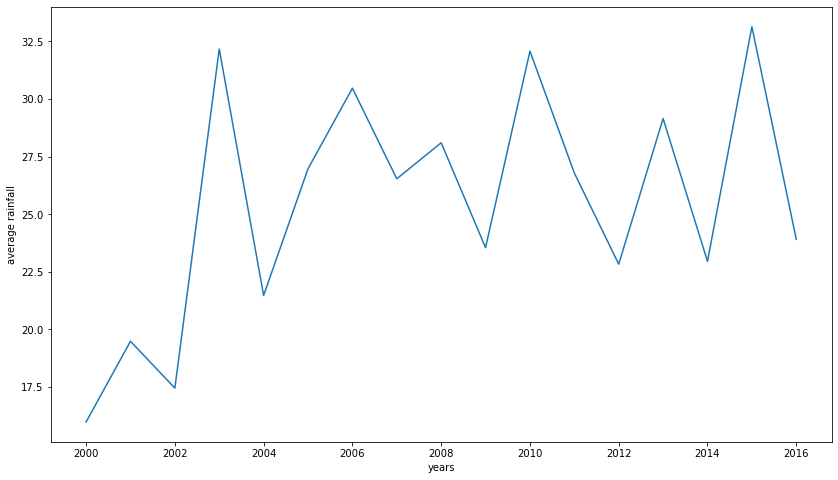

In [20]:
#plotting the data by taking mean across the year
plt.figure(figsize=(14,8))
plt.plot(df_after_2k.groupby(['year']).mean())
plt.xlabel('years')
plt.ylabel('average rainfall')
plt.show()

In [21]:
#calculating mean across months
avg_rainfall_by_month_after_2k=df_after_2k.groupby(df_after_2k.month)['rainfall-MM'].mean()

# Leading Month
August take a lead this time

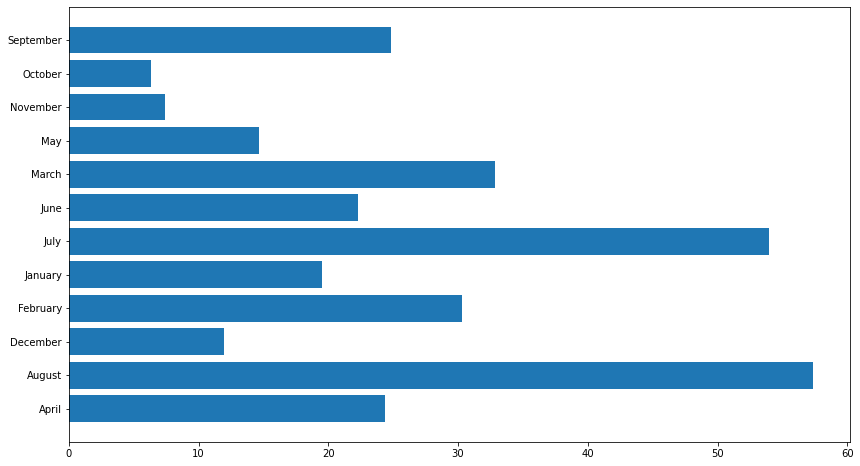

In [22]:
#Plotting average rainfall in a month after 2020
plt.figure(figsize=(14,8))
plt.barh(avg_rainfall_by_month_after_2k.index,avg_rainfall_by_month_after_2k)
plt.show()

In [23]:
avg_rainfall_across_years_after_2k=df_after_2k.groupby(df_after_2k.year)['rainfall-MM'].mean()

In [24]:
avg_rainfall_across_years_after_2k

year
2000    15.983080
2001    19.488182
2002    17.455713
2003    32.173924
2004    21.477698
2005    26.974240
2006    30.470729
2007    26.539996
2008    28.102989
2009    23.550433
2010    32.079900
2011    26.790030
2012    22.835234
2013    29.153537
2014    22.957235
2015    33.140839
2016    23.913655
Name: rainfall-MM, dtype: float64